In [29]:
import numpy as np
import pandas as pd
import tarfile
import urllib.request
from pathlib import Path


def load_housing_data():
    tarball_path = Path("numpyex/housing.tgz")
    if not tarball_path.is_file():
        Path("numpyex").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="numpyex")
    return pd.read_csv(Path("numpyex/housing/housing.csv"))
house=load_housing_data()
house.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


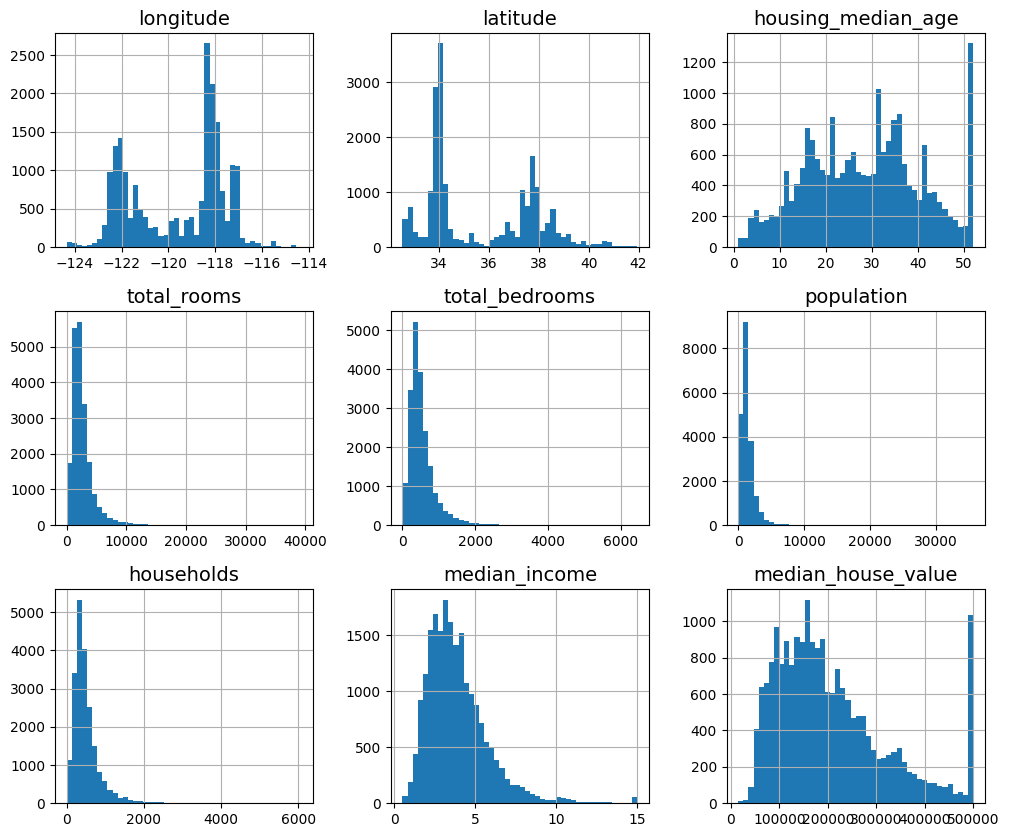

In [31]:

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
house.hist(bins=46,figsize=(12,10))
plt.show()










    


In [32]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(house, test_size=0.2)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
999,-118.13,34.15,24.0,1125.0,341.0,579.0,321.0,2.8125,141700.0,<1H OCEAN
7981,-122.13,37.44,38.0,2835.0,447.0,1148.0,446.0,5.9277,446600.0,NEAR BAY
9535,-120.88,37.52,2.0,1871.0,409.0,707.0,256.0,2.6103,133600.0,INLAND
12642,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,146400.0,INLAND
3618,-118.14,34.04,40.0,1966.0,391.0,1120.0,362.0,3.7109,198800.0,<1H OCEAN


In [33]:
house["med_inc_cat"] = pd.cut(house["median_income"], bins=[0, 1, 3, 4, 6, np.inf], labels=[1, 2, 3, 4, 5])

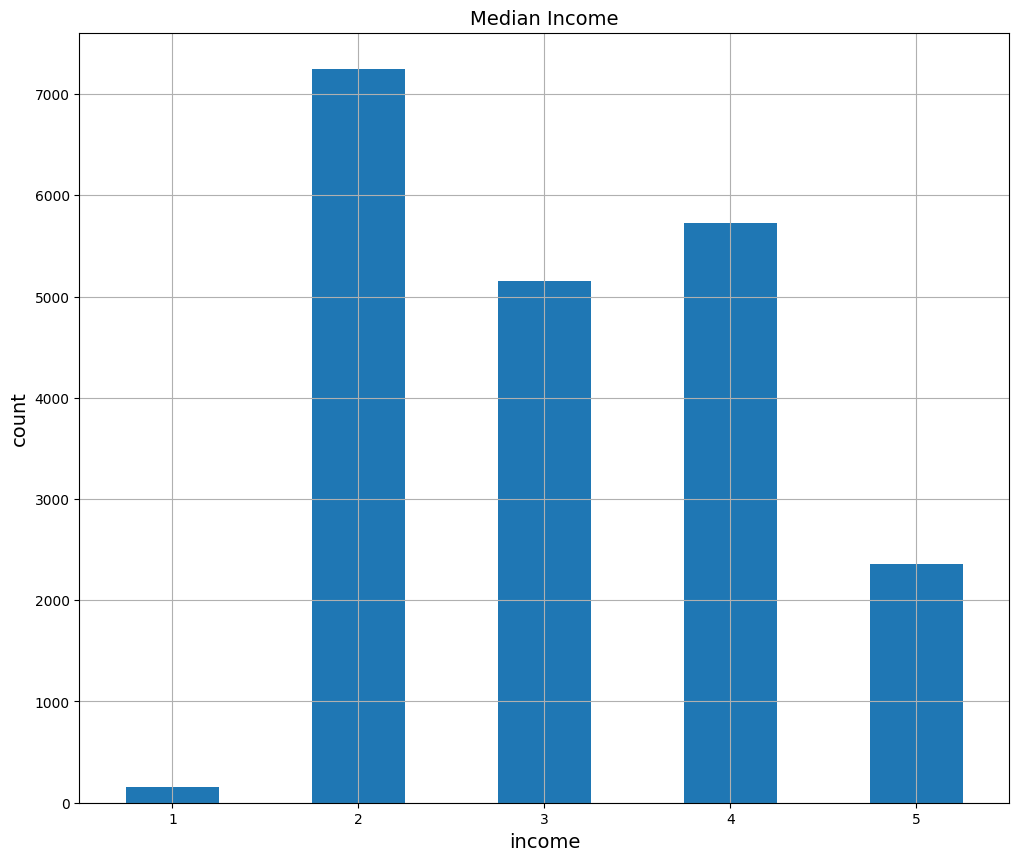

In [34]:
house["med_inc_cat"].value_counts().sort_index().plot.bar(rot=0, figsize=(12,10),grid=True)
plt.title("Median Income")
plt.xlabel("income")
plt.ylabel("count")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
house, test_size=0.2, stratify=house["med_inc_cat"], random_state=42)
strat_test_set["med_inc_cat"].value_counts() / len(strat_test_set)

    
    
    
    
    
    
    
    


med_inc_cat
2    0.351017
4    0.277374
3    0.249516
5    0.114341
1    0.007752
Name: count, dtype: float64

In [36]:
strat_train_set.copy()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,med_inc_cat
13671,-121.95,37.29,30.0,3734.0,813.0,1834.0,824.0,3.4505,260000.0,<1H OCEAN,3
399,-122.05,37.38,24.0,2424.0,501.0,1367.0,507.0,4.0720,364200.0,<1H OCEAN,4
260,-117.63,33.47,4.0,2320.0,405.0,1408.0,477.0,6.3369,256000.0,NEAR OCEAN,5
13793,-124.17,40.80,52.0,1606.0,419.0,891.0,367.0,1.5850,75500.0,NEAR OCEAN,2
5542,-118.24,34.16,52.0,850.0,162.0,493.0,160.0,6.9408,298800.0,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...,...
4207,-120.95,37.73,12.0,3609.0,712.0,2650.0,742.0,2.8565,92700.0,INLAND,2
6180,-122.48,37.65,39.0,3348.0,666.0,1817.0,668.0,4.2593,227400.0,NEAR OCEAN,4
1741,-120.58,38.77,21.0,1661.0,406.0,789.0,319.0,2.3583,108700.0,INLAND,2
11854,-118.13,33.77,37.0,4365.0,926.0,1661.0,868.0,5.3046,360700.0,NEAR OCEAN,4


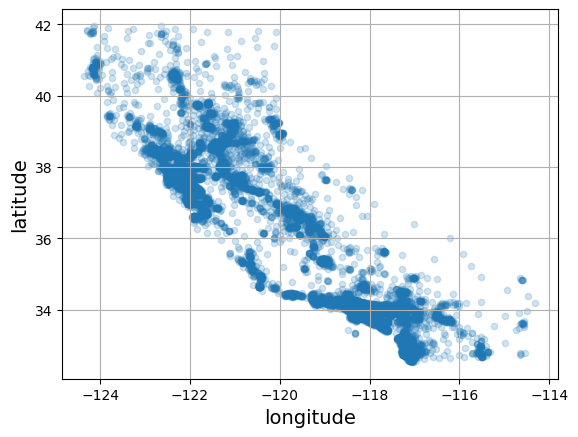

In [37]:
house.plot(kind="scatter",x="longitude",y="latitude",grid="True",alpha=0.2)
plt.show()

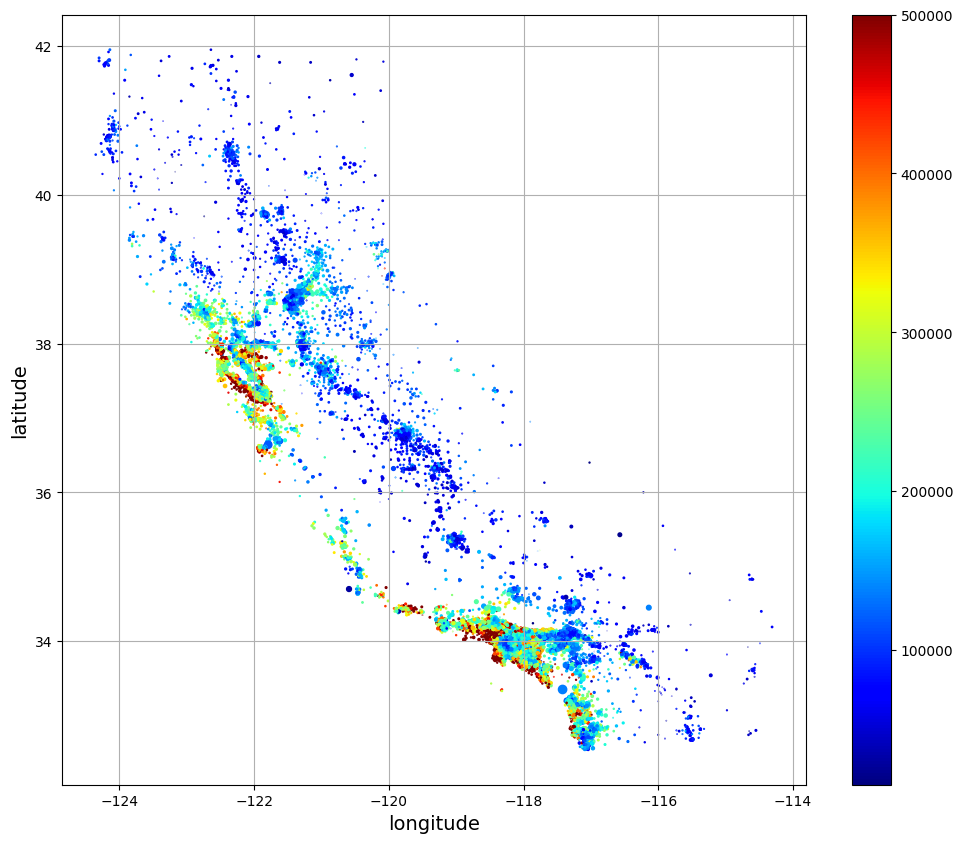

In [38]:
house.plot(kind="scatter",x="longitude",y="latitude",grid="True",s=(house["population"])/1000,c=house["median_house_value"],cmap="jet",colorbar=True,legend=True
,figsize=(12,10))
plt.show()

In [39]:
house["med_inc_c"] = pd.cut(house["median_income"], bins=[0, 1, 3, 4, 6, np.inf], labels=[1, 2, 3, 4, 5])


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>,
        <Axes: xlabel='longitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>,
        <Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='total_rooms', ylabel='population'>,
        <Axes: xlabel='latitude', ylabel='population'>,
        <Axes: xlabel='longitude', ylabel='population'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabe

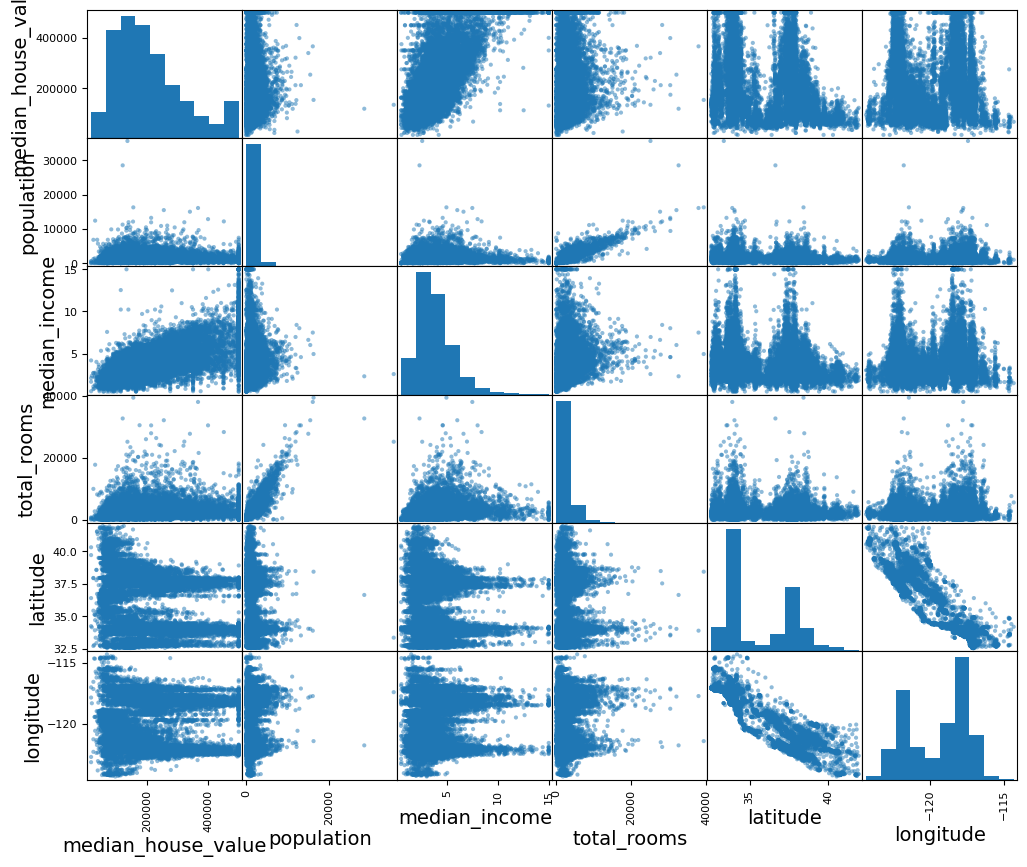

In [40]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","population","median_income","total_rooms","latitude","longitude"]
scatter_matrix(house[attributes],figsize=(12,10))
                                               



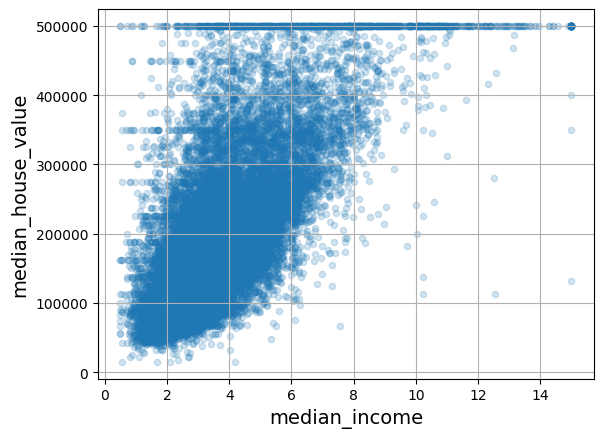

In [41]:
house.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2,grid=True)
plt.show()

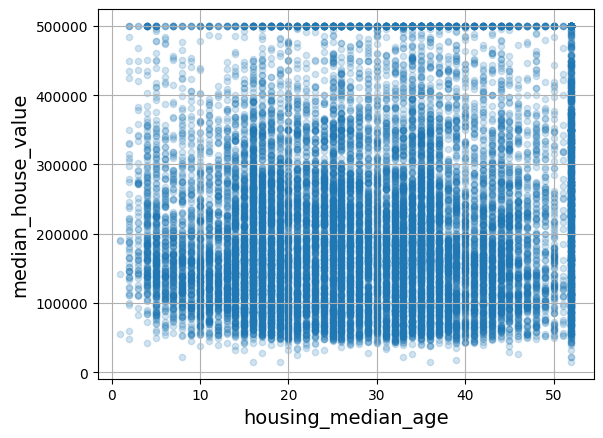

In [42]:
house.plot(kind="scatter",x="housing_median_age",y="median_house_value",alpha=0.2,grid=True)
plt.show()

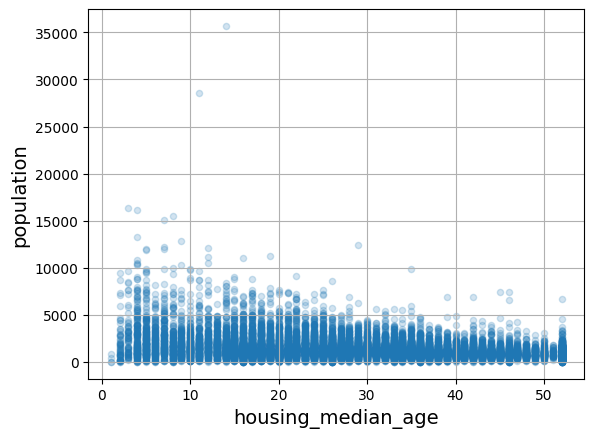

In [43]:
house.plot(kind="scatter",x="housing_median_age",y="population",alpha=0.2,grid=True)
plt.show()

In [44]:
housing_labels=strat_train_set["median_house_value"].copy()#separating the labels and the predictors


















In [45]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer( strategy='median')
housing_num=house.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_





array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [46]:
X=imputer.transform(housing_num)



In [47]:
#as imputing changes the dataset into a array so it needs to be again changed into a data frame with features and labels
house_df=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)



In [48]:
housing_head=house[["ocean_proximity"]]
housing_head.head(10)
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
encoded_op=encoder.fit_transform(housing_head)
print(encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder_oh=OneHotEncoder()
encoded_oh=encoder_oh.fit_transform(housing_head)
print(encoded_oh.toarray())


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [50]:
df_test=pd.DataFrame({"ocean_proximity" : ["INLAND","NEAR BAY"]} )
print(pd.get_dummies(df_test))

   ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                    True                     False
1                   False                      True


In [51]:
df_unknown_test=pd.DataFrame({"ocean_proximity" : ["ISLAND","NEAR OCEAN"]} )
print(pd.get_dummies(df_unknown_test))

   ocean_proximity_ISLAND  ocean_proximity_NEAR OCEAN
0                    True                       False
1                   False                        True


In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown="ignore")


encoded_oh=encoder.fit_transform(df_unknown_test)
print(encoded_oh.toarray())




[[1. 0.]
 [0. 1.]]


In [53]:
print(encoder.feature_names_in_)
print(encoder.get_feature_names_out())
print(encoder.transform(df_unknown_test).shape)
print(len(encoder.get_feature_names_out()))   

print(encoder.transform(df_unknown_test).shape)  # Actual transformed shape
print(len(encoder.get_feature_names_out()))      # Expected number of columns
print(encoder.categories_)  # Categories learned during training
print(df_unknown_test.head())





['ocean_proximity']
['ocean_proximity_ISLAND' 'ocean_proximity_NEAR OCEAN']
(2, 2)
2
(2, 2)
2
[array(['ISLAND', 'NEAR OCEAN'], dtype=object)]
  ocean_proximity
0          ISLAND
1      NEAR OCEAN


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))






def ratio(X):
    return X[:,[0]]/X[:,[1]]
def ratio_name(feature_transformer,features_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(ratio,feature_names_out=ratio_name),StandardScaler())
log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log,feature_names_out="one-to-one")
)
cluster_simil=KMeans(n_clusters=10,n_init=10,random_state=100)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
custom_trans=ColumnTransformer([
    ("pop_per_house",ratio_pipeline(),["population","households"]),
    ("rooms_per_house",ratio_pipeline(),["total_rooms","households"]),
    ("bedroom_per_room",ratio_pipeline(),["total_bedrooms","total_rooms"]),
    ("log",log_pipeline,["total_rooms","total_bedrooms","median_income","population"]),
    ("geographical",cluster_simil,["longitude","latitude"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include="object")),
    
    
    
    
],
   remainder=default_num_pipeline)
house_prepared=custom_trans.fit_transform(house)
print(house_prepared.shape)
    


    


        


(20640, 26)


In [55]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(custom_trans,LinearRegression())



lin_reg.fit(house, housing_labels)

# Predict and print results
predictions = lin_reg.predict(house)
print(predictions[:5].round(-2))



ValueError: Found input variables with inconsistent numbers of samples: [20640, 16512]